In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.layers import Dense, Dropout, Activation,Flatten,Conv2D,MaxPooling2D
from keras.models import Sequential, load_model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
labels = 10

x_train  = x_train/255
x_test  = x_test/255

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [129]:
model = Sequential()
model.add(Conv2D(16, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(labels))
model.add(Activation('softmax'))

model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_45 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
activation_46 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 7200)            

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

model.save('CNN_CIFAR.h5')
model = load_model('CNN_CIFAR.h5')

Epoch 1/25
1563/1563 [==============================] - 64s 41ms/step - loss: 1.4381 - acc: 0.4809 - val_loss: 1.1463 - val_acc: 0.6080
Epoch 2/25
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1194 - acc: 0.6024 - val_loss: 0.9771 - val_acc: 0.6574
Epoch 3/25
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9942 - acc: 0.6472 - val_loss: 0.9198 - val_acc: 0.6760
Epoch 4/25
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8983 - acc: 0.6839 - val_loss: 0.8816 - val_acc: 0.6933
Epoch 5/25
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8258 - acc: 0.7096 - val_loss: 0.8496 - val_acc: 0.7049
Epoch 6/25
1563/1563 [==============================] - 65s 41ms/step - loss: 0.7624 - acc: 0.7287 - val_loss: 0.8403 - val_acc: 0.7151
Epoch 7/25
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7093 - acc: 0.7484 - val_loss: 0.8414 - val_acc: 0.7112
Epoch 8/25
1563/1563 [==========================

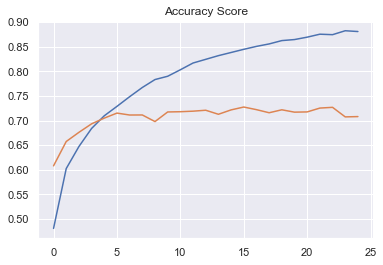

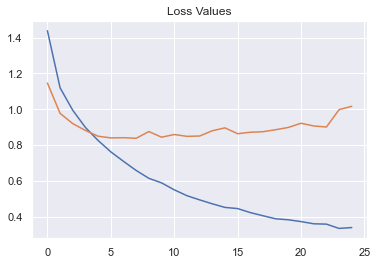

In [131]:
plt.title('Accuracy Score')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.show()

plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Results

## epoch = 5
### accuracy score max value is 0.78
### loss value is 0.90

## epoch = 10
### accuracy score max value is 0.80
### loss value is 1.4

## epoch = 15
### accuracy score max value is 0.85
### loss value is 1.4

## epoch = 20
### accuracy score max value is 0.85
### loss value is 1.4

## epoch = 25
### accuracy score max value is 0.90
### loss value is 1.4

## According to the results of different epoch trials, it is a more optimum result if the epoch value is equal to 25 (Accuracy score is higher than other epoch values). However, choosing the number of epochs may differ from case to case.